In [1]:
###-----------------
### Import Libraries
###-----------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer=pd.read_csv('BreastCancer.csv',index_col=0)

cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [3]:
lbl=LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])  
cancer

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,1
1371026,5,10,10,10,4,10,5,6,3,1
1371920,5,1,1,1,2,1,3,2,1,0


In [4]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=23,
                                               stratify=y)

In [6]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [7]:
y_pred_proba=lr.predict_proba(X_test)[:,1]   #

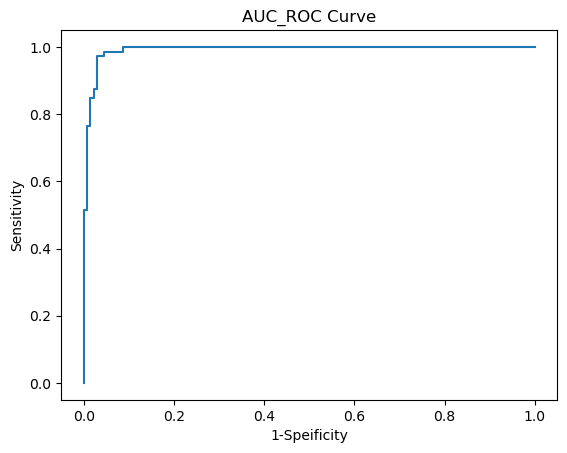

In [8]:
fpr,tpr,thres=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("AUC_ROC Curve")
plt.xlabel("1-Speificity")
plt.ylabel("Sensitivity")
plt.show()

In [9]:
print(roc_auc_score(y_test,y_pred_proba))

0.9917471819645732


In [10]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'penalty':["l1","l2","elastic",None],
       'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],}

gcv=GridSearchCV(lr,param_grid=params,cv=kfold,scoring='roc_auc')
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

{'penalty': 'l2', 'solver': 'lbfgs'}
0.9938674854796193
